<a href="https://colab.research.google.com/github/Tranminhtuan48/pythonbasics/blob/main/pandas%20tong%20hop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

2. Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
dt = pd.read_csv('/content/gdrive/MyDrive/database.csv')
dt = dt.iloc[:,1:]
dt.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,...,0,0,0,0,1,1,0,0,0,0
1,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,...,0,0,0,0,0,0,0,0,1,0
2,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,...,0,0,0,0,0,0,0,0,0,0
4,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [41]:
dt.describe().columns

Index(['Incident Year', 'Incident Month', 'Incident Day', 'Aircraft Mass',
       'Engine Make', 'Engines', 'Engine2 Position', 'Engine4 Position',
       'Height', 'Speed', 'Distance', 'Fatalities', 'Injuries',
       'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike',
       'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Damage',
       'Tail Strike', 'Tail Damage', 'Lights Strike', 'Lights Damage',
       'Other Strike', 'Other Damage'],
      dtype='object')

3. Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

In [23]:
#Phep huong tam
#Phan vi
#Min - Max
dt.describe()

,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,71258.000000,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,141.925622,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,46.905651,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,160.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,2500.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#phuong sai
dt.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Incident Year           4.553156e+01
Incident Month          7.784949e+00
Incident Day            7.742953e+01
Aircraft Mass           7.634969e-01
Engine Make             1.215101e+02
Engines                 2.203115e-01
Engine2 Position        4.032884e+00
Engine4 Position        2.076482e+00
Height                  3.253156e+06
Speed                   2.200140e+03
Distance                1.200253e+01
Fatalities              1.893680e-01
Injuries                4.318118e+01
Aircraft Damage         7.858569e-02
Radome Strike           9.614632e-02
Radome Damage           9.066039e-03
Windshield Strike       1.196322e-01
Windshield Damage       5.920768e-03
Nose Strike             1.073957e-01
Nose Damage             6.533316e-03
Engine1 Strike          5.251312e-02
Engine1 Damage          1.423680e-02
Engine2 Strike          4.312847e-02
Engine2 Damage          1.148455e-02
Engine3 Strike          3.171899e-03
Engine3 Damage          9.697475e-04
Engine4 Strike          1.914724e-03
E

4. Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hien các ngoại lệ không? Nếu có thì ở cột nào?

In [42]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

KeyError: ignored

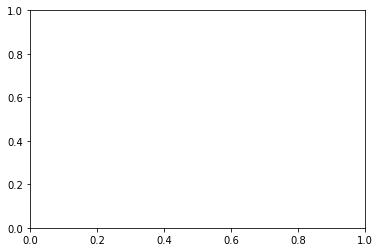

In [45]:
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")
plot_boxplot(dt,"")

In [37]:
# tim q1
q1 = np.quantile(data1, 0.25)
 
# tim q3
q3 = np.quantile(data1, 0.75)
med = np.median(data1)
 
# tim iqr (do trai giua)
iqr = q3-q1
 
# tim diem tren duoi
up = q3+(1.5*iqr)
low = q1-(1.5*iqr)
print(iqr, up, low)

4.0 15.0 -1.0


In [38]:
#tim outliers
ot = data1[(data1 <= low) | (data1 >= up)]
print('outliers'.format(ot))

outliers


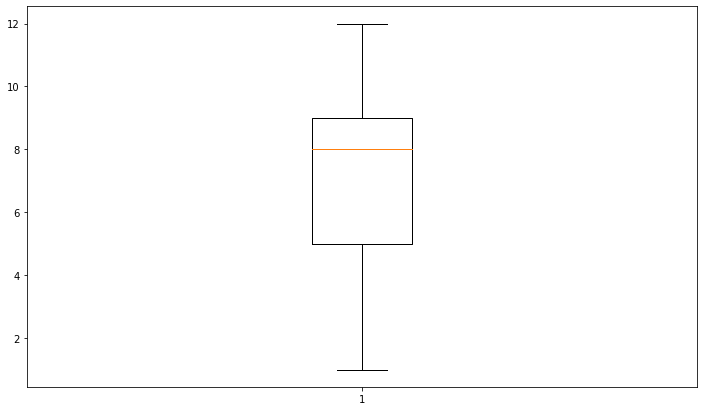

In [39]:
# loai bo ngoai le
data2 = data1[(data1 >= low) & (data1 <= up)]
plt.figure(figsize=(12, 7))
plt.boxplot(data2)
plt.show()